In [1]:
import numpy as np
import random 
import time
import matplotlib.pyplot as plt


In [2]:
# Definir la función objetivo 
def objective_function(x):
    return np.sum(x**2)

In [3]:
def Graficar_convergencia(fitness_generaciones):
 # Crear el gráfico
  plt.figure(figsize=(10, 6))
  plt.plot(fitness_generaciones, marker='o', linestyle='-')
  plt.title('Convergencia del Fitness a lo largo de las generaciones')
  plt.xlabel('Generaciones')
  plt.ylabel('Fitness')
  plt.ylim(bottom=0)
  plt.grid(True)
  plt.show()

In [4]:
# Inicialización de la población
def initialize_population(pop_size, dim, lower_bound, upper_bound):
    population = []
    for _ in range(pop_size):
        solution = lower_bound + (upper_bound - lower_bound) * np.random.rand(dim)
        fitness = objective_function(solution)
        population.append((solution, fitness))
    return population

# Evaluación de la población (se utiliza al seleccionar la nueva generación)
def evaluate_population(population):
    return [objective_function(ind[0]) for ind in population]

# Selección de los machos (bulls) según su aptitud
def select_bulls(population, bull_rate):
    num_bulls = int(bull_rate * len(population))
    sorted_population = sorted(population, key=lambda x: x[1])
    return sorted_population[:num_bulls]

# Asignación de los harems a los machos
def assign_harems(population, bulls):
    harems = []
    for _ in bulls:
        probabilities = np.array([ind[1] for ind in population])
        probabilities = probabilities / np.sum(probabilities)
        harem_index = np.random.choice(range(len(population)), p=probabilities)
        harems.append(population[harem_index][0])
    return harems

"""# Reproducción (calving) de nuevos individuos (crías)
def reproduce(bulls, harems, dim):
    new_population = []
    for bull, harem in zip(bulls, harems):
        calf = bull[0] + np.random.rand(dim) * (harem - bull[0])
        fitness = objective_function(calf)
        new_population.append((calf, fitness))
    return new_population
"""
def reproduce(bulls, harems, dim):
    new_population = []
    for bull, harem in zip(bulls, harems):
        if np.random.rand() < 0.5:
            # Caso 1: La cría hereda principalmente del toro
            calf = bull[0] + np.random.rand(dim) * (harem[0] - bull[0])
        else:
            # Caso 2: La cría hereda de ambos padres
            r = np.random.rand()
            beta = np.random.uniform(0, 2)
            gamma = np.random.uniform(0, 2)
            calf = bull[0] + beta * (harem - bull[0]) + gamma * r * (bull[0] - harem)
        
        fitness = objective_function(calf)
        new_population.append((calf, fitness))
    return new_population

# Selección de la nueva generación
def select_new_population(population, new_population, pop_size):

    population.extend(new_population)
    population.sort(key=lambda x: x[1])
    return population[:pop_size]

# Función para mostrar la población
def display_population(population):
    for i, (solution, fitness) in enumerate(population):
        print(f"Individuo {i+1}: Solución = {solution}, fitness = {fitness}")


In [5]:
# Algoritmo principal del EHO
def elk_herd_optimizer(dim, pop_size, lower_bound, upper_bound, bull_rate, max_iter):
    population = initialize_population(pop_size, dim, lower_bound, upper_bound)
    fitness_generation = []
    for iteration in range(max_iter):
        bulls = select_bulls(population, bull_rate)
        harems = assign_harems(population, bulls)
        new_population = reproduce(bulls, harems, dim)
        population = select_new_population(population, new_population, pop_size)

        # Salida de la mejor solución en la iteración actual
        best_fitness = min(fitness for _, fitness in population)

        print(f"Iteración {iteration + 1}: Mejor fitness = {best_fitness}")
        fitness_generation.append(best_fitness)

    best_solution, best_fitness = min(population, key=lambda x: x[1])
    return population, best_solution, best_fitness, fitness_generation


Iteración 1: Mejor fitness = 256144.00895566167
Iteración 2: Mejor fitness = 108963.03294658645
Iteración 3: Mejor fitness = 77958.96989530568
Iteración 4: Mejor fitness = 73993.04665899645
Iteración 5: Mejor fitness = 40416.1935589935
Iteración 6: Mejor fitness = 40416.1935589935
Iteración 7: Mejor fitness = 34019.435591421054
Iteración 8: Mejor fitness = 17396.613198658903
Iteración 9: Mejor fitness = 11616.837001662087
Iteración 10: Mejor fitness = 10839.45902554207
Iteración 11: Mejor fitness = 3132.775820144731
Iteración 12: Mejor fitness = 2400.8862621852913
Iteración 13: Mejor fitness = 2400.8862621852913
Iteración 14: Mejor fitness = 796.371063545109
Iteración 15: Mejor fitness = 719.6180409513146
Iteración 16: Mejor fitness = 719.6180409513146
Iteración 17: Mejor fitness = 404.69347511084095
Iteración 18: Mejor fitness = 404.69347511084095
Iteración 19: Mejor fitness = 389.4629450943755
Iteración 20: Mejor fitness = 117.3148628473567
Iteración 21: Mejor fitness = 117.314862847

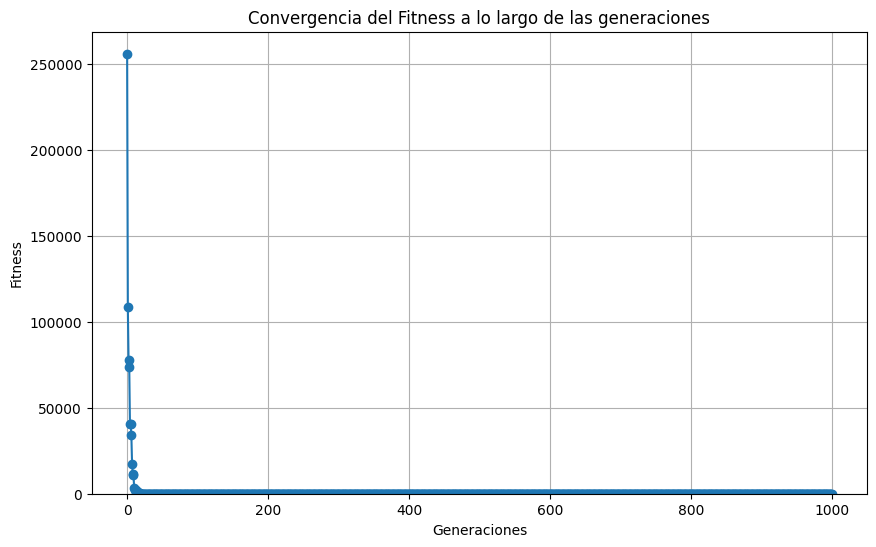

Mejor solución encontrada: [ 1.91325793e-83  2.94948186e-84  2.47494775e-83  2.09447874e-83
 -3.09848455e-83  2.03407758e-84  1.86972959e-83  3.64089106e-84
  2.25552709e-83  1.69358926e-83]
Mejor aptitud encontrada: 3.5485835808117597e-165
Tiempo de ejecución: 9.181688070297241


In [6]:
# Parámetros del algoritmo
dim = 10                    # Dimensionalidad del problema
pop_size = 500               # Tamaño de la población
lower_bound = -1000          # Límite inferior de las variables
upper_bound = 1000           # Límite superior de las variables
bull_rate = 0.3             # Tasa de machos en la población
max_iter = 1000             # Número máximo de iteraciones

# Ejecutar el EHO
tiempo_inicial = time.time()
population, best_solution, best_fitness, fitness_generation = elk_herd_optimizer(dim, pop_size, lower_bound, upper_bound, bull_rate, max_iter)
tiempo_final = time.time()
tiempo_ejecucion = tiempo_final - tiempo_inicial
Graficar_convergencia(fitness_generation)
print("Mejor solución encontrada:", best_solution)
print("Mejor aptitud encontrada:", best_fitness)
print("Tiempo de ejecución:", tiempo_ejecucion)